In [6]:
# Get the Data

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
messages=pd.read_csv("messages.csv")



In [9]:
messages

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [10]:
print(len(messages))

2893


In [11]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)
    print('\n')

0 subject


1 message


2 label




<img src='http://www.astroml.org/sklearn_tutorial/_images/plot_ML_flow_chart_3.png' width=600/>

In [12]:

messages.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [13]:
messages.tail()

,subject,message,label
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0
2892,re : american - english in australia,hello ! i ' m working on a thesis concerning a...,0


## Exploratory Data Analysis



In [4]:
messages.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
messages.groupby('label').describe()

subject                               message         \
        count unique               top freq   count unique   
label                                                        
0        2363   2193  sociolinguistics    8    2412   2401   
1         468    420              re :    7     481    458   

                                                               
                                                     top freq  
label                                                          
0      fourth conference on afro-asiatic languages ce...    2  
1      this is not spam ; you are receiving this mess...    5

In [6]:
messages['length'] = messages['message'].apply(len)
messages.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


### Data Visualization
Let's visualize this! Let's do the imports:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

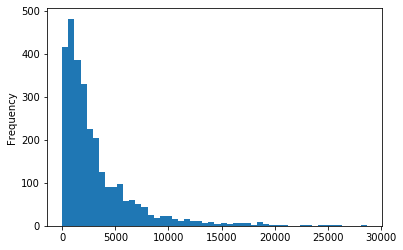

In [8]:
messages['length'].plot(bins=50, kind='hist') 

In [9]:
messages.length.describe()

count     2893.000000
mean      3230.122019
std       3654.605695
min         17.000000
25%        954.000000
50%       2026.000000
75%       4039.000000
max      28649.000000
Name: length, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

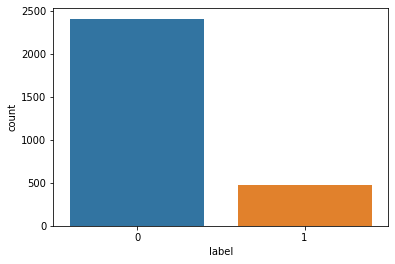

In [16]:
import seaborn as sns
sns.countplot(x=messages['label'])

In [10]:
messages[messages['length'] == 910]['message'].iloc[0]

'in agreement with some of the comments posted about " of " in " coulda " ( and let \'s include hadda ) etc . , it is interesting to me that so many readers knowledgeable about linguistics see any more than a graphic convention attempting to represent the homophony of \' ve with " of " here . it leads to interesting questions about how spelling affects our " mental " lexical representations of words , as literate beings . however , it is questionable whether whatever " psychological reality " the spelling " of " in " could of " has for the literate will have any effect on the future of the language ( since that was brought up ) . i think the spelling " of " for unstressed " have " has about as much chance of making a verb of the other " of " as the spelling " we " would have of making french " oui " an english pronoun . the evolution of parentheses into phonological segments is perhaps more likely .\n'

In [37]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [38]:
messages.dtypes

subject    object
message    object
label       int64
dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019AFFC89F88>,
      dtype=object)

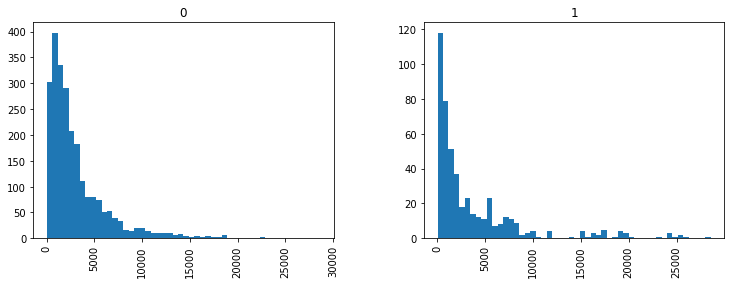

In [11]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

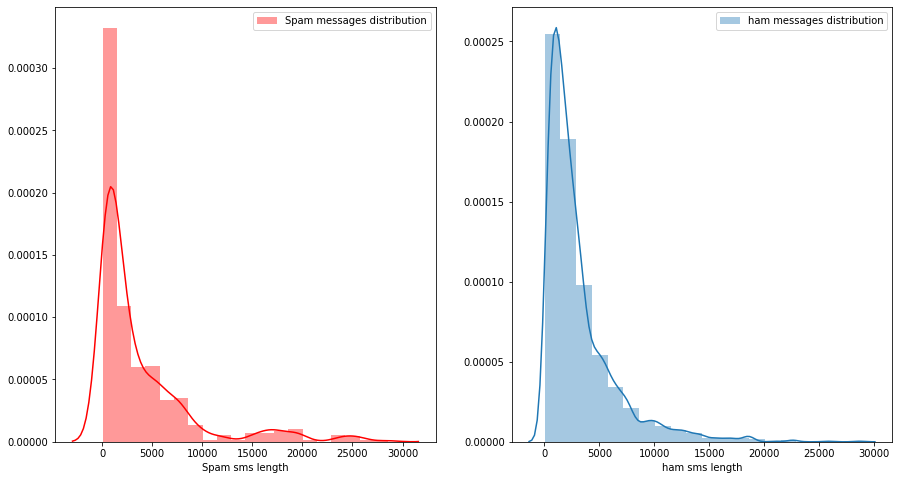

In [12]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(messages[messages['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(messages[messages['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

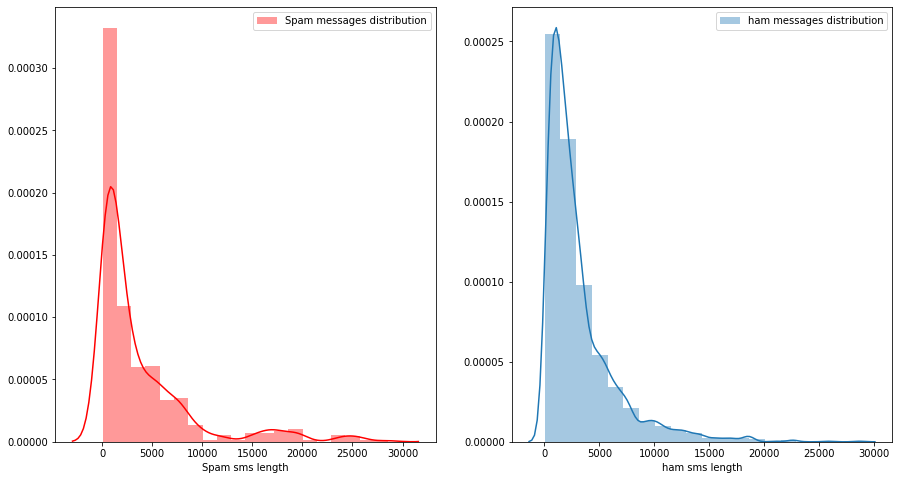

In [14]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(messages[messages['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(messages[messages['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

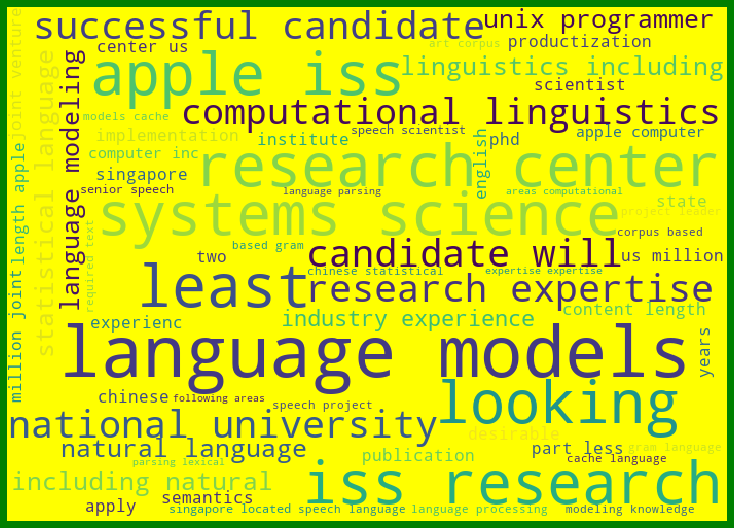

In [22]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = messages['message'][messages['label']]

spam_cloud = WordCloud(width=700,height=500,background_color='yellow',max_words=66).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

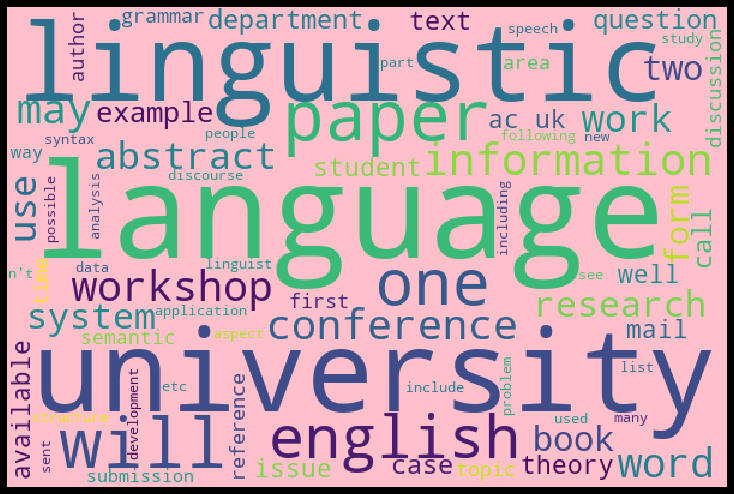

In [23]:
#Getting sense of loud words in ham 

hams = messages['message'][messages['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='pink',max_words=70).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [24]:
import string

test = 'something is very wrong!!!!!.'

# Check characters to see if they are in punctuation
clean_punc = [char for char in test if char not in string.punctuation]

# Join the characters again to form the string.
clean_punc = ''.join(clean_punc)

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [26]:
clean_punc.split()

['something', 'is', 'very', 'wrong']

In [27]:
# Now just remove any stopwords
cleaned_text = [word for word in clean_punc.split() if word.lower() not in stopwords.words('english')]

In [28]:
cleaned_text

['something', 'wrong']

In [29]:
def text_process(text):
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
messages.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [31]:

messages['message'].head(5).apply(text_process)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

In [32]:
messages['message'].head(5).apply(text_process)

0    [content, length, 3386, appleiss, research, ce...
1    [lang, classification, grimes, joseph, e, barb...
2    [posting, inquiry, sergei, atamas, satamas, um...
3    [colleague, researching, differing, degrees, r...
4    [earlier, morning, phone, friend, mine, living...
Name: message, dtype: object

In [35]:

messages.head(25)


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [34]:
messages.tail(20)

,subject,message,label
2873,parsers for russian,this query was also posted to seelangs - - apo...,0
2874,case studies needed,"dear colleagues , i ' m preparing to teach an ...",0
2875,"re : 8 . 1107 , qs : lang . games , "" democrat...",dear mr . ungar : is us congress incorrect ? a...,0
2876,indoeuropean courses listed by universities ( ...,the titus project & the indogermanische gesell...,0
2877,job : indonesian / asian studies,lecturer ( indonesian / asian studies ) ( ref ...,0
2878,"re : 6 . 797 , comparative method : n - ary co...",critics of manaster ramer miss the main point ...,0
2879,summary : heavy onsets references,original query :\n,0
2880,sum master 's dissertation,"dear netters , about a week ago i asked for he...",0
2881,internships in israel,i have recently moved to israel and am studyin...,0
2882,accept credit cards and watch sales skyrocket !,increase online sales up to 200 % http : / / 3...,1


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:

bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])
print(len(bow_transformer.vocabulary_))

64661


In [31]:
message4 = messages['message'][3]
print(message4)

a colleague and i are researching the differing degrees of risk perceived by our hong kong students in different contexts where spoken english is required . we would be interested to find out more about research in the area of risk-taking in language learning . so far we have n't come up with much . can anyone help here ?



In [32]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 9170)	1
  (0, 9550)	1
  (0, 15963)	1
  (0, 16080)	1
  (0, 17011)	1
  (0, 18946)	1
  (0, 19823)	1
  (0, 19835)	1
  (0, 22436)	1
  (0, 24136)	1
  (0, 24732)	1
  (0, 28910)	1
  (0, 29660)	1
  (0, 31853)	1
  (0, 34653)	1
  (0, 35428)	1
  (0, 35778)	1
  (0, 40796)	1
  (0, 42843)	1
  (0, 45343)	1
  (0, 50013)	1
  (0, 50040)	1
  (0, 50047)	1
  (0, 50660)	1
  (0, 50665)	1
  (0, 54990)	1
  (0, 55885)	1
  (0, 63648)	1
(1, 64661)


In [33]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

4791
ares


In [34]:
messages_bow = bow_transformer.transform(messages['message'])

In [35]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (2893, 64661)
Amount of Non-Zero occurences:  545316


In [36]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 63648)	0.09906137400724713
  (0, 55885)	0.13827303721762738
  (0, 54990)	0.16749869696529832
  (0, 50665)	0.3585752053461137
  (0, 50660)	0.22691307786619508
  (0, 50047)	0.2769570318338709
  (0, 50040)	0.10283078013865428
  (0, 50013)	0.15728831073549404
  (0, 45343)	0.26385254671241254
  (0, 42843)	0.12608144777832525
  (0, 40796)	0.13380019699110607
  (0, 35778)	0.15877585417980128
  (0, 35428)	0.07879330197272683
  (0, 34653)	0.23624186679838444
  (0, 31853)	0.1302297826722719
  (0, 29660)	0.2313390780166541
  (0, 28910)	0.14336794762517718
  (0, 24732)	0.13720117670652762
  (0, 24136)	0.16418838108814185
  (0, 22436)	0.09998788669254909
  (0, 19835)	0.2795607101838915
  (0, 19823)	0.1258973991644821
  (0, 18946)	0.2372890846418792
  (0, 17011)	0.20023206225956566
  (0, 16080)	0.1484979593773378
  (0, 15963)	0.24538281228930384
  (0, 9550)	0.14296542391647932
  (0, 9170)	0.14269903736808642


In [38]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.0145575377265983
1.6794201290484474


In [39]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2893, 64661)


In [40]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [41]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

predicted: 0
expected: 0


In [42]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

[0 0 0 ... 0 0 0]


<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png' width=400 />

In [43]:
from sklearn.metrics import classification_report
print (classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2412
           1       1.00      0.48      0.65       481

    accuracy                           0.91      2893
   macro avg       0.95      0.74      0.80      2893
weighted avg       0.92      0.91      0.90      2893



In [44]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

2314 579 2893


In [46]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

In [47]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000019A822DBD38>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [48]:
predictions = pipeline.predict(msg_test)

In [49]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       559
           1       0.20      1.00      0.33        20

    accuracy                           0.86       579
   macro avg       0.60      0.93      0.62       579
weighted avg       0.97      0.86      0.90       579

